<a href="https://colab.research.google.com/github/naruemonssp/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## นำข้อมูลเข้าและอ่านค่า pizza


In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/Pizza.csv')
data.head

<bound method NDFrame.head of     brand     id   mois   prot    fat   ash  sodium   carb   cal
0       A  14069  27.82  21.43  44.87  5.11    1.77   0.77  4.93
1       A  14053  28.49  21.26  43.89  5.34    1.79   1.02  4.84
2       A  14025  28.35  19.99  45.78  5.08    1.63   0.80  4.95
3       A  14016  30.55  20.15  43.13  4.79    1.61   1.38  4.74
4       A  14005  30.49  21.28  41.65  4.82    1.64   1.76  4.67
..    ...    ...    ...    ...    ...   ...     ...    ...   ...
295     J  34044  44.91  11.07  17.00  2.49    0.66  25.36  2.91
296     J  24069  43.15  11.79  18.46  2.43    0.67  24.17  3.10
297     J  34039  44.55  11.01  16.03  2.43    0.64  25.98  2.92
298     J  14044  47.60  10.43  15.18  2.32    0.56  24.47  2.76
299     J  14045  46.84   9.91  15.50  2.27    0.57  25.48  2.81

[300 rows x 9 columns]>

In [4]:
data = pd.read_csv('/content/Pizza.csv')
data.head(10)   ### แสดงผลข้อมูล 10 ข้อมูล

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


### ตรวจสอบขนาดข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [8]:
data.shape  ## มี 300 แถว, 9 คอลลัมน์

(300, 9)

### plot scatter เพื่อดูการกระจายของ data ในมุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43d46380d0>,
      dtype=object)

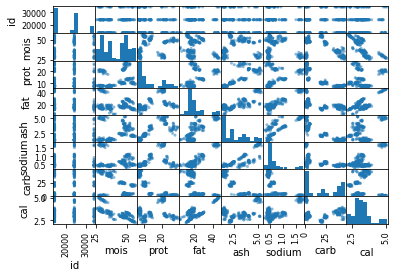

In [11]:
pd.plotting.scatter_matrix(data)

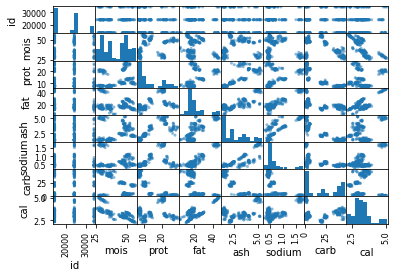

In [10]:
pd.plotting.scatter_matrix(data);

### ทดสอบว่า colum ใด ให้ข้อมูลซ้ำกับ colum อื่น แล้วลบออก

In [13]:
newdata = data.iloc[:,2:]    ### เลือกเฉพาะข้อมูลที่เป็นตัวเลข
newdata.head()    

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


### ใช้ numpy ตรวจสอบว่าระหว่าง Column มี Correlation กันมากน้อยแค่ไหน

In [14]:
import numpy as np

In [20]:
corr = np.corrcoef(newdata.to_numpy().T)
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [21]:
corr.shape

(7, 7)

In [26]:
for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if (i !=j )  and (corr[i,j] == 1.):
                print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')  ### มีค่าไม่ซ้ำกัน

### plot กราฟ parallel corrdinate

In [34]:
from matplotlib import pyplot as plt

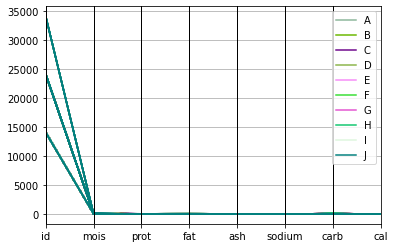

In [35]:
pd.plotting.parallel_coordinates(data,'brand') 

In [37]:
data_dropped = data.drop(['brand','id'], axis=1)    ### เอารายการที่เป็นรายชื่อออก
data_dropped

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


### plot กราฟ parallel coordinate


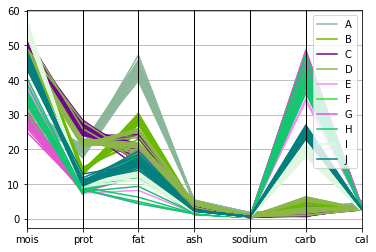

In [41]:
pd.plotting.parallel_coordinates(data_dropped,'brand')

## ทำ PCA เพื่อลดจำนวน dimension ของข้อมูล


In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2) 

In [45]:
new_pca = pca.fit_transform(data_dropped2.to_numpy())

In [46]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

In [47]:
new_pca.shape

(300, 2)

### ดูว่า brand มีอะไรบ้าง

In [49]:
Pizza = set(data['brand'])
Pizza

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

### สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

### แปลงเป็น list แล้วเรียงสมาชิกจากน้อยไปมาก

In [56]:
Pizza_l = list2(Pizza)
Pizza_l.sort() 
color_list = {}
num = 0
for each_pizza in Pizza_l:
  if each_pizza not in color_list2:
    color_list2[each_pizza] = num
    num+=1

In [58]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [59]:
data_dropped = data.replace(color_list2)

In [60]:
data_dropped

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,9,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


### plot กราฟ Scatter

In [62]:
from matplotlib import pyplot as plt

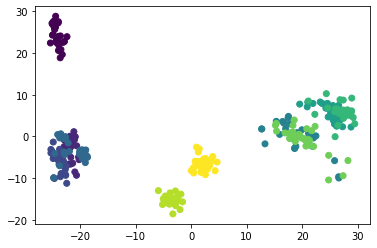

In [63]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'])

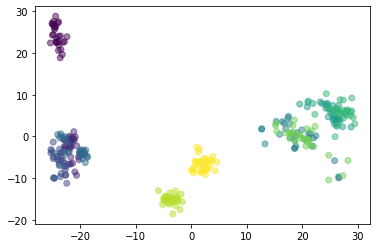

In [67]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'],alpha=0.5) ### alpha คือความโปร่งใส

### เปรียบเทียบสารอาหาร brand C และ G


In [80]:
CG = data_dropped[(data_dropped['brand']==3) | (data_dropped['brand']==6)]  
CG

,brand,id,mois,prot,fat,ash,sodium,carb,cal
87,3,14092,46.64,21.38,24.96,4.60,0.77,2.42,3.20
88,3,14081,45.93,21.60,25.87,4.51,0.73,2.09,3.28
89,3,14072,47.60,22.07,21.13,4.07,0.72,5.13,2.99
90,3,14116,47.61,22.44,19.61,4.06,0.60,6.28,2.91
91,3,14128,46.91,21.79,21.17,4.06,0.76,6.07,3.02
...,...,...,...,...,...,...,...,...,...
201,6,34008,26.45,7.89,17.97,1.30,0.39,46.39,3.79
202,6,34018,27.72,8.24,15.16,1.46,0.45,47.42,3.59
203,6,24059,25.00,8.49,16.87,1.45,0.47,48.19,3.79
204,6,34013,29.14,8.46,12.25,1.51,0.46,48.64,3.39


### ใช้ 2 dimention เปรียบเทียบแค่ 2 brand

In [85]:
pca = PCA(n_components=2)     
new_pca2 = pca.fit_transform(pz.iloc[:,1:].to_numpy())

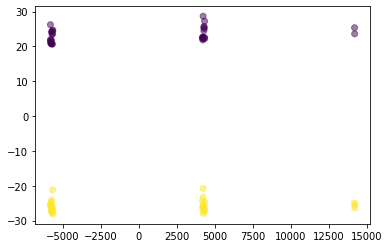

In [87]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = pz['brand'],alpha=0.5)

In [89]:
prot_pca = pca.transform(pz[pz['brand']==3].iloc[:,1:].to_numpy())
cal_pca = pca.transform(pz[pz['brand']==6].iloc[:,1:].to_numpy())

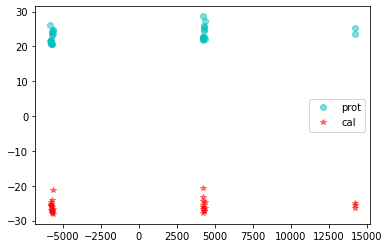

In [92]:
plt.plot(prot_pca[:,0],prot_pca[:,1],'oc',alpha=0.5,label='prot')
plt.plot(cal_pca[:,0],cal_pca[:,1],'*r',alpha=0.5,label='cal')
plt.legend()

In [93]:
pca.explained_variance_ratio_

array([9.99984988e-01, 1.48401818e-05])

### สร้างกราฟและตั้งชื่อกราฟ

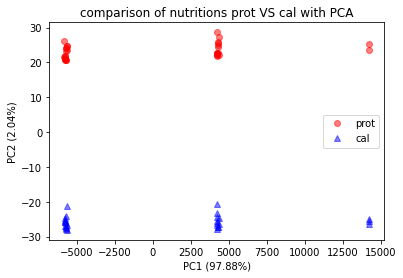

In [97]:
plt.plot(prot_pca[:,0],prot_pca[:,1],'or',alpha=0.5,label='prot')
plt.plot(cal_pca[:,0],cal_pca[:,1],'^b',alpha=0.5,label='cal')
plt.legend()
plt.title('comparison of nutritions prot VS cal with PCA')   ### ชื่อกราฟ
plt.xlabel('PC1 (97.88%)')   ### ชื่อแกน X
plt.ylabel('PC2 (2.04%)');  ### ชื่อแกน y

จากการเปรียบเทียบสารอาหารระหว่าง brand C และ brand G แล้ว PC1(97.88%) + PC2(2.04%) ได้ 99.92% ดังนั้น components จึงอธิบาย variance ได้ครอบคลุม

## นำข้อมูลเข้าและอ่านค่า nndb_flat



In [100]:
import pandas as pd

In [103]:
data = pd.read_csv('/content/nndb_flat.csv')
data.head(10)   ### แสดงข้อมูล 10 ค่า

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


### ตรวจสอบขนาดข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [105]:
data.shape  ## มี 8618 แถว, 45 คอลัมน์

(8618, 45)

### plot scatter เพื่อดูการกระจายของ data ในมุมมองต่างๆ

In [ ]:
pd.plotting.scatter_matrix(data)

### ทดสอบว่า colum ใด ให้ข้อมูลซ้ำกับ colum อื่น แล้วลบออก

In [107]:
newdata = data.iloc[:,7:] ###เลือกมาทำเฉพาะข้อมูลที่เป็นตัวเลข  ### ใช้เลข 7 เพราะข้อมูลตัวเลขเริ่มที่ column 7
newdata.head()   

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


### ใช้ numpy ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน 

In [109]:
import numpy as np

In [111]:
corr = np.corrcoef(newdata.to_numpy().T)
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [112]:
corr.shape

(38, 38)

In [113]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') #ดูว่าชื่อ columns มีความสัมพันธ์กัน

row = 10 column = 27 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 14 column = 31 corrcoef = 1.0
row = 18 column = 34 corrcoef = 1.0
row = 20 column = 35 corrcoef = 1.0
row = 22 column = 37 corrcoef = 1.0
row = 27 column = 10 corrcoef = 1.0
row = 29 column = 12 corrcoef = 1.0
row = 30 column = 13 corrcoef = 1.0
row = 31 column = 14 corrcoef = 1.0
row = 34 column = 18 corrcoef = 1.0
row = 35 column = 20 corrcoef = 1.0
row = 37 column = 22 corrcoef = 1.0


### correlation เป็น 1
ข้อมูลจะเป็นเส้นตรง

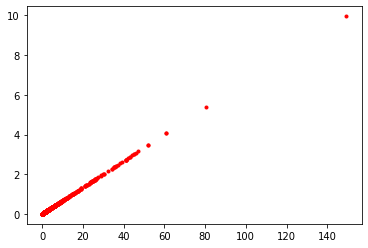

In [114]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,27],'r.')

### correlation เป็นค่าอื่นๆ
ข้อมูลจะกระจายตัวไม่เป็นระเบียบ

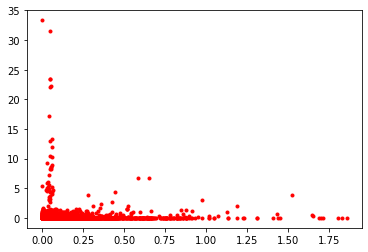

In [117]:
plt.plot(newdata.iloc[:,34],newdata.iloc[:,23],'r.')

ตรวจสอบคอลัมม์ที่ซ้ำ

In [119]:
data.columns  

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

### ลบ column ซ้ำ


คอลัมน์ที่เป็น True จะมีคำว่า _USRDA อยู่ในคอลัมน์

In [120]:
newdata.columns.str.contains('_USRDA')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [121]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [122]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


### ลบ columns ที่มีค่า correlation เป็น 1

In [123]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [124]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


### ทดลอง plot กราฟ parallel coordinate

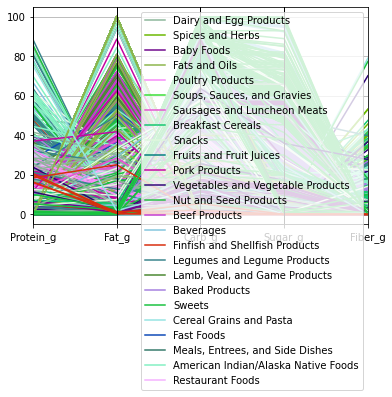

In [126]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

In [127]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA(n_components=2)

In [132]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

In [131]:
new_pca.shape

(8618, 2)

In [133]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

### ดูว่ามี food group อะไรบ้าง

In [134]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

### สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

### แปลงเป็น list แล้วเรียงสมาชิกจากน้อยไปมาก

In [136]:
FG_l = list(FG)  
FG_l.sort() 
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [137]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

### แทนค่า text ใน Dictionary ด้วยตัวเลขที่กำหนด

In [138]:
data_dropped2 = data_dropped.replace(color_list2)

In [139]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


### Plot กราฟ Scatter

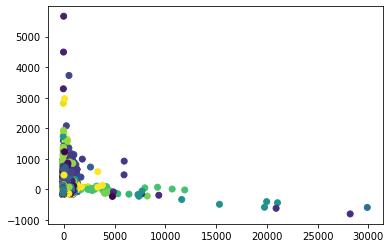

In [140]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

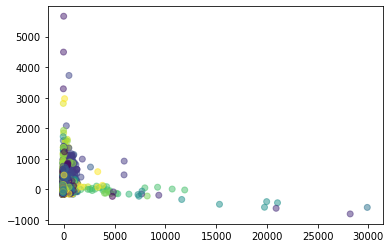

In [141]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

### ทดลอง เปรียบเทียบค่าสารอาหาร Meals, Entrees, and Side Dishes และ Snacks

In [142]:
MS = data_dropped2[(data_dropped2['FoodGroup']==14) | (data_dropped2['FoodGroup']==20)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
MS

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
2031,20,413.0,6.47,10.98,72.05,45.97,0.4,188.0,0.819,2.00,15.4,159.0,410.0,0.049,5.99,0.206,7.7,0.208889,0.481765,0.833333,0.171111,0.028000,0.3975,0.512125,0.535385,0.512500,0.341667,0.000054,0.050000,0.221429,0.140000,0.076364
2042,20,409.0,9.09,9.09,72.73,31.80,1.8,0.0,0.909,0.00,0.0,15.0,31.0,0.185,2.56,1.407,24.9,0.000000,0.534706,0.000000,0.000000,0.196000,0.0375,0.568187,0.594615,0.568333,0.025833,0.000206,0.109524,0.194286,0.452727,0.161818
6005,20,410.0,33.20,25.60,11.00,9.00,1.8,0.0,0.179,0.99,0.0,134.0,20.0,0.227,5.42,0.111,10.7,0.000000,0.105294,0.412500,0.000000,0.032667,0.3350,0.108250,0.109231,0.128333,0.016667,0.000252,0.121429,0.581429,0.194545,0.737273
6006,20,538.0,6.17,33.36,56.90,0.27,4.0,3.0,0.167,0.00,0.0,8.0,138.0,0.101,1.20,0.333,7.6,0.003333,0.098235,0.000000,0.000000,0.482000,0.0200,0.052625,0.060000,0.039167,0.115000,0.000112,0.171429,0.277143,0.138182,0.117273
6007,20,523.0,7.00,32.70,56.20,0.00,5.2,31.0,0.230,0.00,1.7,39.0,131.0,0.166,1.54,0.774,4.1,0.034444,0.135294,0.000000,0.018889,0.000000,0.0975,0.102813,0.161538,0.062500,0.109167,0.000184,0.183333,0.295714,0.074545,0.096364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542,20,503.0,7.79,23.36,65.32,1.00,5.3,4.0,0.213,0.36,0.0,10.0,174.0,0.523,2.32,0.000,6.7,0.004444,0.125294,0.150000,0.000000,0.235333,0.0250,0.078875,0.076923,0.012500,0.145000,0.000581,0.347619,0.285714,0.121818,0.223636
8568,20,557.0,6.60,33.40,57.40,1.41,4.4,4.0,0.210,0.00,2.0,7.0,124.0,0.249,1.70,0.000,6.7,0.004444,0.123529,0.000000,0.022222,0.090667,0.0175,0.092500,0.123077,0.116667,0.103333,0.000277,0.166667,0.262857,0.121818,0.077273
8591,20,465.0,8.70,15.20,73.40,0.53,5.7,4.0,0.180,0.06,0.2,16.0,159.0,0.116,1.63,0.000,15.7,0.004444,0.105882,0.025000,0.002222,0.235333,0.0400,0.026250,0.215385,0.183333,0.132500,0.000129,0.230952,0.454286,0.285455,0.104545
8593,20,429.0,12.60,9.50,73.39,0.54,14.2,7.0,0.170,0.00,0.0,17.0,11.0,0.545,2.28,0.000,8.6,0.007778,0.100000,0.000000,0.000000,0.334000,0.0425,0.129375,0.084615,0.291667,0.009167,0.000606,0.359524,0.377143,0.156364,0.348182


In [143]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(MS.iloc[:,1:].to_numpy())

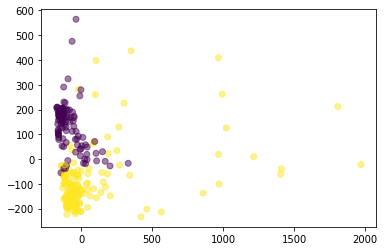

In [144]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = MS['FoodGroup'],alpha=0.5)

In [148]:
ME_pca = pca.transform(MS[MS['FoodGroup']==14].iloc[:,1:].to_numpy())
SN_pca = pca.transform(MS[MS['FoodGroup']==20].iloc[:,1:].to_numpy())

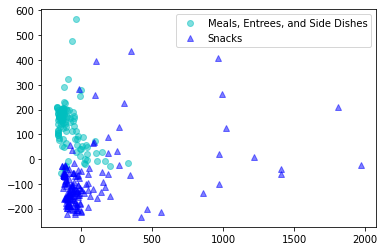

In [153]:
plt.plot(ME_pca[:,0],ME_pca[:,1],'oc',alpha=0.5,label='Meals, Entrees, and Side Dishes')
plt.plot(SN_pca[:,0],SN_pca[:,1],'^b',alpha=0.5,label='Snacks')
plt.legend()

### 2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [154]:
pca.explained_variance_ratio_

array([0.54345443, 0.16174678])

### สร้างกราฟและตั้งชื่อกราฟ

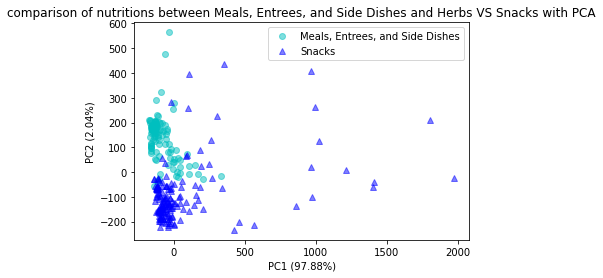

In [156]:
plt.plot(ME_pca[:,0],ME_pca[:,1],'oc',alpha=0.5,label='Meals, Entrees, and Side Dishes')
plt.plot(SN_pca[:,0],SN_pca[:,1],'^b',alpha=0.5,label='Snacks')
plt.legend()
plt.title('comparison of nutritions between Meals, Entrees, and Side Dishes and Herbs VS Snacks with PCA')
plt.xlabel('PC1 (97.88%)')
plt.ylabel('PC2 (2.04%)');

จากการเปรียบเทียบสารอาหารระหว่าง Meals, Entrees, and Side Dishes and Herbs และ Snacks แล้ว PC1(97.88%) + PC2(2.04%) ได้ 99.92% ดังนั้น components จึงอธิบาย variance ได้ครอบคลุม